## Day 28 Lecture 1 Assignment

In this assignment, we will learn about making predictions with linear models. We will use the king county housing dataset loaded below and analyze the regression from this dataset.

In [0]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
king_county = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/kc_house_data.csv')

In [11]:
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We'll start by adding a column of the log of total sqare feet. This transformation will help us with model assumptions.

In [0]:
# answer below:
king_county['log_sqr_feet']= np.log(king_county['sqft_living'])

Filter out columns and keeping only: price, bedrooms, bathrooms, sqft_living, floors, waterfront

In [0]:
# answer below:
king_county_flt = king_county[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront','log_sqr_feet']]


Next, we'll check for missing values and remove rows containing missing values. We will also make sure that all our data is numeric and convert the columns that are of object type to numeric. Make sure to remove any rows with missing data resulting from the conversion to numeric.

In [14]:
# answer below:
king_county_flt.isna().sum()
king_county.isna().sum().sum()

0

Split the data into test and train subsets. Use 20% of the data for the test subset. Use price as the dependent variable.

In [0]:
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

In [33]:
# answer below:
from sklearn.model_selection import train_test_split
X= king_county_flt.drop('price', axis=1)
y = king_county_flt['price']
X=sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [34]:
model_price = sm.OLS(y_train, X_train)
results = model_price.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     3829.
Date:                Wed, 06 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:36:57   Log-Likelihood:            -2.3876e+05
No. Observations:               17290   AIC:                         4.775e+05
Df Residuals:                   17283   BIC:                         4.776e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.317e+06   9.92e+04     33.434      0.000    3.12e+06    3.51e+06
bedrooms     -2.782e+04   2536.304    -10.968      0.000   -3.28e+04   -2.28e+04
bathrooms     2.745e+04   4045.925      6.784      0.000    1.95e+04    3.54e+04
sqft_living    490.1553      6.758     72.528      0.000     476.909     503.402
floors        1.227e+04   3953.008      3.103      0.002    4518.162       2e+04
waterfront    7.791e+05   2.08e+04     37.395      0.000    7.38e+05     8.2e+05
log_sqr_feet -5.013e+05   1.52e+04    -32.913      0.000   -5.31e+05   -4.71e+05
==============================================================================
Omnibus:                     7966.636   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           164639.177
Skew:                           1.725   Prob(JB):                         0.00
Kurtosis:                      17.718   Cond. No.                     1.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
predict = results.predict(X_test)
error = y_test - predict

Check the model assumptions: homoscedacity, normal errors, and multicollinearity

In [24]:
#answer below:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predict, error)
lev_stats = levene(predict, error)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))


Bartlett test statistic value is 112.007 and p value is 3.56e-26
Levene test statistic value is 10.7426 and p value is 0.00105


In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [26]:
pd.Series ([variance_inflation_factor(X.values,i ) for i in range(X.shape[1])], index = X.columns)

const           2979.227027
bedrooms           1.679702
bathrooms          2.861574
sqft_living       11.645606
floors             1.356422
waterfront         1.019909
log_sqr_feet      12.680281
dtype: float64

There are two model assumptions that fail. One way to fix them is to apply a log transformation to price. Create a new train test split where y is the natural log of price and retest the model assumptions.

In [36]:
# answer below
X=sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,np.log(y), test_size=0.2)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [37]:
model_price = sm.OLS(y_train, X_train)
results = model_price.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     2985.
Date:                Wed, 06 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:37:37   Log-Likelihood:                -7282.8
No. Observations:               17290   AIC:                         1.458e+04
Df Residuals:                   17283   BIC:                         1.463e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.7606      0.154     69.848      0.000      10.459      11.063
bedrooms        -0.0610      0.004    -14.958      0.000      -0.069      -0.053
bathrooms        0.0230      0.006      3.751      0.000       0.011       0.035
sqft_living      0.0003   1.05e-05     28.781      0.000       0.000       0.000
floors           0.0532      0.006      8.811      0.000       0.041       0.065
waterfront       0.6272      0.034     18.670      0.000       0.561       0.693
log_sqr_feet     0.2289      0.024      9.674      0.000       0.183       0.275
==============================================================================
Omnibus:                       56.863   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.052
Skew:                           0.060   Prob(JB):                     6.06e-11
Kurtosis:                       2.774   Cond. No.                     1.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Create a linear model and produce a model summary

In [30]:
# answer below
predict = results.predict(X_test)
error = y_test - predict

bart_stats = bartlett(predict, error)
lev_stats = levene(predict, error)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))


Bartlett test statistic value is 1.53958 and p value is 0.215
Levene test statistic value is 13.7303 and p value is 0.000212


Predict the y values for the test sample using our model above.

Plot the true vs. predicted values and compute the MAE, MSE, RMSE and MAPE

In [0]:
# answer below:
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


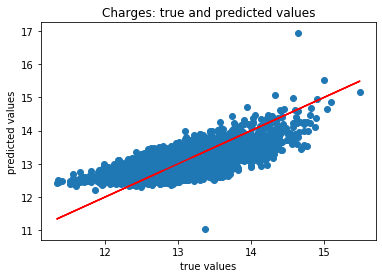

Mean absolute error of the prediction is: 0.3041209781951147
Mean squared error of the prediction is: 0.14111850443924423
Root mean squared error of the prediction is: 0.3756574296340274
Mean absolute percentage error of the prediction is: 2.3352550953342726


In [38]:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))
